In [2]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE

In [3]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
#Remove Identifiers

df.drop("Car_Name",axis=1,inplace=True)

In [8]:
## DATA PRE PROCESSING 
df['Present_Year']=2022

In [9]:
df['Age_Year']=df['Present_Year']-df['Year']
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Age_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022,6
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022,7
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022,13
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022,5


In [10]:
df.drop(['Year','Present_Year'],axis=1,inplace=True)

In [11]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


### ***ENCODING OF DATA***

In [12]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


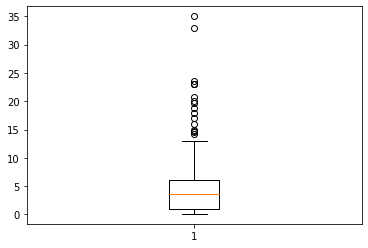

In [13]:
plt.boxplot(df['Selling_Price'])
plt.show()

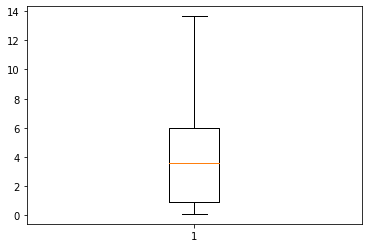

In [17]:
Q1,Q3 = df['Selling_Price'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)
df['Selling_Price']=np.where(df['Selling_Price']>UL,UL,df['Selling_Price'])
plt.boxplot(df['Selling_Price'])
plt.show()


In [15]:
corr=df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,[1,2,4,5,6,7]]
Y=df.iloc[:,0]


In [22]:
X

,Present_Price,Kms_Driven,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
0,5.59,27000,8,0,1,0
1,9.54,43000,9,1,0,0
2,9.85,6900,5,0,1,0
3,4.15,5200,11,0,1,0
4,6.87,42450,8,1,0,0
...,...,...,...,...,...,...
296,11.60,33988,6,1,0,0
297,5.90,60000,7,0,1,0
298,11.00,87934,13,0,1,0
299,12.50,9000,5,1,0,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
model=LinearRegression().fit(x_train,y_train)
model

LinearRegression()

In [25]:
model.score(x_test,y_test)

0.8773378702238134

In [26]:
model.score(x_train,y_train)

0.8094107800264911

In [27]:
y_predict=model.predict(x_test)
y_predict

array([ 5.98538523e+00,  3.95944246e+00, -4.05502034e-01,  5.05191946e+00,
        5.38660151e-01,  6.05285756e+00,  1.93693433e+00,  3.46525773e+00,
        6.80368524e+00,  1.17504438e+00,  7.77349479e+00,  4.32353868e+00,
        5.37131743e+00,  4.86801614e+00, -1.88882990e+00,  1.50142420e+00,
        7.67042047e+00,  6.66165641e+00,  5.07171794e+00,  7.65927679e+00,
        3.23098696e+00,  4.03040610e+00,  7.07359501e+00,  5.92906434e+00,
        3.16736448e+00,  3.86112178e+00,  3.98896538e+00,  1.18838363e+00,
        8.76460176e-03, -3.09558343e-01,  3.55539561e-01, -8.14262988e-01,
        4.98123884e+00,  1.31315623e+01,  1.22892523e+01,  4.85979960e+00,
        4.08451193e+00,  1.62567083e+00, -4.24806195e-02,  4.46538062e+00,
        7.21902875e+00,  8.76730845e+00,  3.60448695e-01,  6.46316649e+00,
        6.49096597e+00,  4.85600697e+00,  7.16833170e+00,  5.84423125e+00,
        7.74713051e+00,  1.52349846e+00,  4.56734374e+00,  1.85238286e+00,
        3.52233240e+00,  

In [32]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 0.9328125524831002
